**Seungjae Lee and Michael Yu**

Fall 2019

CS343: Neural Networks

Project 3: Convolutional Neural Networks

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=7)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

**Global note: Make sure any debug printouts do not appear if `verbose=False`!**

## Task 4) Implement weight optimizers for gradient descent

To change the weights during training, we need an optimization algorithm to have our loss decrease over epochs as we learn the structure of the input patterns. Until now, we used **Stochastic gradient descent (SGD)**, which is the simplest algorithm. We will implement 3 popular algorithms:

- `SGD` (stochastic gradient descent)
- `SGD_Momentum` (stochastic gradient descent with momentum)
- `Adam` (Adaptive Moment Estimation)

Implement each of these according to the update equations (in `optimizer.py::update_weights` in each subclass). Let's use $w_t$ in the math below to represent the weights in a layer at time step $t$, $dw$ to represent the gradient of the weights in a layer, and $\eta$ represent the learning rate. We use vectorized notation below (update applies to all weights element-wise). Then:

**SGD**: 

$w_{t} = w_{t-1} - \eta \times dw$

**SGD (momentum)**:

$v_{t} = m \times v_{t-1} - \eta \times dw$

$w_{t} = w_{t-1} + v_t$

where $v_t$ is called the `velocity` at time $t$. At the first time step (0), velocity should be set to all zeros and have the same shape as $w$. $m$ is a constant that determines how much of the gradient obtained on the previous time step should factor into the weight update for the current time step.


**Adam**:

$m_{t} = \beta_1 \times m_{t-1} + (1 - \beta_1)\times dw$

$v_{t} = \beta_2 \times v_{t-1} + (1 - \beta_2)\times dw^2$

$n = m_{t} / \left (1-(\beta_1^t) \right )$

$u = v_{t} / \left (1-(\beta_2^t) \right )$

$w_{t} = w_{t-1} - \left ( \eta \times n \right ) / \left ( \sqrt(u) + \epsilon \right ) $


Like SGD (momentum), Adam records momentum terms $m$ and $v$. At time step 0, you should initialize them to zeros in an array equal in size to the weights. $n$ and $u$ are variables computed on each time step. The remaining quantities are constants. Note that $t$ keeps track of the integer time step, and needs to be incremented on each update. 

In [2]:
from optimizer import *

####  Test SGD

In [3]:
np.random.seed(0)

wts = np.arange(-3, 3, dtype=np.float64)
d_wts = np.random.randn(len(wts))

optimizer = SGD()
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()

print(f'SGD: Wts after 1 iter {new_wts_1}')
print(f'SGD: Wts after 2 iter {new_wts_2}')

SGD: Wts after 1 iter [-3.1764052 -2.0400157 -1.0978738 -0.2240893  0.8132442  2.0977278]
SGD: Wts after 2 iter [-3.3528105 -2.0800314 -1.1957476 -0.4481786  0.6264884  2.1954556]


Output should be:

    SGD: Wts after 1 iter [-3.1764052 -2.0400157 -1.0978738 -0.2240893  0.8132442  2.0977278]
    SGD: Wts after 2 iter [-3.3528105 -2.0800314 -1.1957476 -0.4481786  0.6264884  2.1954556]

####  Test SGD_Momentum

In [4]:
np.random.seed(0)

wts = np.random.randn(3, 4)
d_wts = np.random.randn(3, 4)

optimizer = SGD_Momentum(lr=0.1, m=0.6)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()

print(f'SGD M: Wts after 1 iter\n{new_wts_1}')
print(f'SGD M: Wts after 2 iter\n{new_wts_2}')

SGD M: Wts after 1 iter
[[ 1.6879486  0.3879897  0.9343517  2.2075258]
 [ 1.7181501 -0.9567621  0.9187816 -0.0659476]
 [ 0.1520801  0.3452366  0.0576     1.52849  ]]
SGD M: Wts after 2 iter
[[ 1.5661825  0.3685217  0.8633335  2.1541379]
 [ 1.4790974 -0.9239367  0.8686908  0.0707077]
 [ 0.5605585  0.2406577 -0.0807098  1.6472364]]


Output should be:

    SGD M: Wts after 1 iter
    [[ 1.6879486  0.3879897  0.9343517  2.2075258]
     [ 1.7181501 -0.9567621  0.9187816 -0.0659476]
     [ 0.1520801  0.3452366  0.0576     1.52849  ]]
    SGD M: Wts after 2 iter
    [[ 1.5661825  0.3685217  0.8633335  2.1541379]
     [ 1.4790974 -0.9239367  0.8686908  0.0707077]
     [ 0.5605585  0.2406577 -0.0807098  1.6472364]]

####  Test Adam

In [5]:
np.random.seed(0)

wts = np.random.randn(3, 4)
d_wts = np.random.randn(3, 4)

optimizer = Adam(lr=0.1)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()
new_wts_3 = optimizer.update_weights()

print(f'Adam: Wts after 1 iter\n{new_wts_1}')
print(f'Adam: Wts after 2 iter\n{new_wts_2}')
print(f'Adam: Wts after 3 iter\n{new_wts_3}')

Adam: Wts after 1 iter
[[ 1.6640523  0.3001572  0.878738   2.1408932]
 [ 1.767558  -0.8772779  0.8500884 -0.0513572]
 [-0.0032189  0.3105985  0.0440436  1.5542735]]
Adam: Wts after 2 iter
[[ 1.5640523  0.2001572  0.778738   2.0408932]
 [ 1.667558  -0.7772779  0.7500884  0.0486428]
 [ 0.0967811  0.2105985 -0.0559564  1.6542735]]
Adam: Wts after 3 iter
[[ 1.4640523  0.1001572  0.678738   1.9408932]
 [ 1.567558  -0.6772779  0.6500884  0.1486428]
 [ 0.1967811  0.1105985 -0.1559564  1.7542735]]


Output should be:

    Adam: Wts after 1 iter
    [[ 1.6640523  0.3001572  0.878738   2.1408932]
     [ 1.767558  -0.8772779  0.8500884 -0.0513572]
     [-0.0032189  0.3105985  0.0440436  1.5542735]]
    Adam: Wts after 2 iter
    [[ 1.5640523  0.2001572  0.778738   2.0408932]
     [ 1.667558  -0.7772779  0.7500884  0.0486428]
     [ 0.0967811  0.2105985 -0.0559564  1.6542735]]
    Adam: Wts after 3 iter
    [[ 1.4640523  0.1001572  0.678738   1.9408932]
     [ 1.567558  -0.6772779  0.6500884  0.1486428]
     [ 0.1967811  0.1105985 -0.1559564  1.7542735]]  

## Task 5) Write network training methods

Implement methods in `network.py` to actually train the network, using all the building blocks that you have created. The methods to implement are:

- `predict`
- `fit`. Add an optional parameter `print_every=1` that controls the frequency (in iterations) with which to wait before printing out the loss and iteration number.

## Task 6) Overfitting a convolutional neural network

Usually we try to prevent overfitting, but we can use it as a valuable debugging tool to test out a complex backprop-style neural network. Assuming everything is working, it is almost always the case that we should be able to overfit a tiny dataset with a huge model with tons of parameters (i.e. your CNN). You will use this strategy to verify that your network is working.

Let's use a small amount of real data from STL-10. If everything is working properly, the network should overfit and you should see a significant drop in the loss from its starting value of ~2.3.

### 6a) Move your `preprocess_data.py` from the MLP project

Make the one following change:

- Re-arrange dimensions of `imgs` so that when it is returned, `shape=(Num imgs, RGB color chans, height, width)` (No longer flatten non-batch dimensions)

In [6]:
import load_stl10_dataset
import preprocess_data
from network import ConvNet4
import optimizer

### 6b) Load in STL-10 at 16x16 resolution

If you don't want to wait for STL-10 to download from the internet and resize, copy over your data and numpy folders from your MLP project.

**Notes:**
- You will need to download the new version of `load_stl10_dataset`.
- The different train/test split here won't work if you hard coded the proportions in your `create_splits` implementation! *This isn't catastrophic, it just means that it will take longer to compute accuracy on the validation set.*

In [203]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 16x16
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
stl_imgs, stl_labels = load_stl10_dataset.load(scale_fact=6)
# preprocess
stl_imgs, stl_labels = preprocess_data.preprocess_stl(stl_imgs, stl_labels)
# create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.create_splits(
    stl_imgs, stl_labels, n_train_samps=4548, n_test_samps=400, n_valid_samps=2, n_dev_samps=50)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

classes = np.loadtxt(os.path.join('data', 'stl10_binary', 'class_names.txt'), dtype=str)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 16x16...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
Train data shape:  (4548, 3, 16, 16)
Train labels shape:  (4548,)
Test data shape:  (400, 3, 16, 16)
Test labels shape:  (400,)
Validation data shape:  (2, 3, 16, 16)
Validation labels shape:  (2,)
dev data shape:  (50, 3, 16, 16)
dev labels shape:  (50,)


### 6c) Train and overfit the network on a small STL-10 sample with each optimizer

**Goal:** If your network works, you should see a drop in loss over epochs to 0.

In 3 seperate cells below

- Create 3 different `ConvNet4` networks.
- Compile each with a different optimizer (each net uses a different optimizer).
- Train each on the **dev** set and validate on the tiny validation set (we dont care about out-of-training-set performance here).

You will be making plots demonstrating the overfitting for each optimizer below. **You should train the nets with the same number of epochs such that at least 2/3 of them clearly show loss convergence to a small value; one optimizer may not converge yet, and that's ok**. Cut off the simulations based on the 2/3 that do converge.

Guidelines:

- Weight scales and learning rates of `1e-2` should work well.
- Start by testing the Adam optimizer.
- Remember that the input shape is (3, 16, 16). You need to specify this to the network constructor.
- The hyperparameters are up to you, though I wouldn't recommend a batch size that is too small (close to 1), otherwise it may be tricky to see whether the loss is actually decreasing on average.
- Decreasing `acc_freq` will make the `fit` function evaluate the training and validation accuracy more often. This is a computationally intensive process, so small values come with an increase in training time. On the other hand, checking the accuracy too infrequently means you won't know whether the network is trending toward overfitting the training data, which is what you're checking for.
- Each training session takes ~30 mins on my laptop.

**Caveat emptor:** Training convolutional networks is notoriously computationally intensive. If you experiment with hyperparameters, each training session may take several hours. Use the loss/accuracy print outs to quickly gauge whether your hyperparameter choices are getting your network to decrease in loss. Monitor print outs and interrupt the Jupyter kernel if things are not trending in the right direction. Consider using the Davis 102 iMacs if this is running too slow on your laptop.

In [101]:
#Adam
adam_loss = None
adam_train_acc = None
adam_val_acc = None
net1 = ConvNet4(input_shape=(3, 16,16), wt_scale = 0.01)
net1.compile('adam', lr = 0.01)
adam_loss, adam_train_acc, adam_val_acc = net1.fit(x_dev, y_dev,x_val, y_val,mini_batch_sz=10, n_epochs=150, acc_freq=10)

Starting to train...
750 iterations. 5 iter/epoch.
Time taken for iteration 0:  0.026770353317260742
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.26, Val acc: 0.0
  Train acc: 0.42, Val acc: 0.0
  Train acc: 0.48, Val acc: 0.0
  Train acc: 0.52, Val acc: 0.0
  Train acc: 0.58, Val acc: 0.0
  Train acc: 0.58, Val acc: 0.0
  Train acc: 0.72, Val acc: 0.0
  Train acc: 0.7, Val acc: 0.0
  Train acc: 0.78, Val acc: 0.0
  Train acc: 0.92, Val acc: 0.0
  Train acc: 0.9, Val acc: 0.0
  Train acc: 0.96, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 0.98, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 0.98, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0


KeyboardInterrupt: 

In [108]:
# SGD-M
sgd_m_loss = None
sgd_m_train_acc = None
sgd_m_val_acc = None 
net2 = ConvNet4(input_shape = (3,16,16), wt_scale = 0.01)
net2.compile('sgd_momentum', lr = 0.01)
sgd_m_loss, sgd_m_train_acc, sgd_m_val_acc = net2.fit(x_dev, y_dev,x_val, y_val,mini_batch_sz=10, n_epochs=200, acc_freq=10)

Starting to train...
1000 iterations. 5 iter/epoch.
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
Time taken for iteration 0:  0.033674852053324385
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
  Train acc: 0.22, Val acc: 0.0
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is 

pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
  Train acc: 0.34, Val acc: 0.0
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
  Train acc: 0.36, Val acc: 0.0
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x

pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
  Train acc: 0.5, Val acc: 0.0
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
  Train acc: 0.56, Val acc: 0.0
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=

pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
  Train acc: 0.82, Val acc: 0.0
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10,

pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
  Train acc: 0.8, Val acc: 0.0
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
  Train acc: 0.86, Val acc: 0.0
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=

pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
  Train acc: 0.68, Val acc: 0.0
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
  Train acc: 0.62, Val acc: 0.0
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x

pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
  Train acc: 0.74, Val acc: 0.0
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
  Train acc: 0.86, Val acc: 0.0
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x

In [111]:
# SGD
#we originally ran it with the same conditions with epochs = 50, we decided to keep running the net till we hit 200 epochs
sgd_loss = None
sgd_train_acc = None
sgd_val_acc = None 
#net3 = ConvNet4(input_shape = (3,16,16), wt_scale = 0.01)
#net3.compile('sgd', lr = 0.01)
sgd_loss, sgd_train_acc, sgd_val_acc = net3.fit(x_dev, y_dev,x_val, y_val,mini_batch_sz=10, n_epochs=50, acc_freq=10)

Starting to train...
250 iterations. 5 iter/epoch.
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
Time taken for iteration 0:  0.025850868225097655
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
  Train acc: 0.38, Val acc: 0.0
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (

pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
  Train acc: 0.36, Val acc: 0.0
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
  Train acc: 0.42, Val acc: 0.0
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (10, 3, 22, 22)
pad_x

**Question 3**: Why does decreasing the mini-batch size make the loss print-outs more erratic?

We think that when the batch size is so small, there's more chance for a wider deviation in loss values. 

### 6d) Evaluate the different optimizers

Make 2 "high quality" plots showing the following

- Plot the accuracy (y axis) for the three optimizers as a function of training epoch (x axis).
- Plot the loss (y axis) for the three optimizers as a function of training iteration (x axis).

A high quality plot consists of:
- A useful title
- X and Y axis labels
- A legend

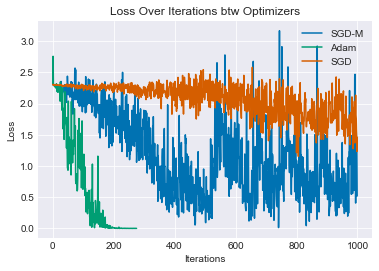

In [139]:
plt.title("Loss Over Iterations btw Optimizers")
plt.plot(net2.loss_history, label = "SGD-M")
plt.plot(net1.loss_history, label = "Adam")
plt.plot(net3.loss_history, label = "SGD")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

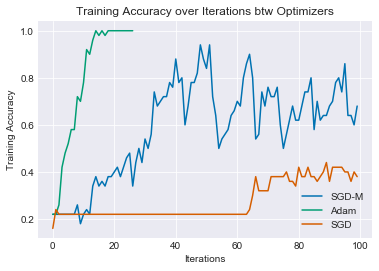

In [140]:


plt.title("Training Accuracy over Iterations btw Optimizers")
plt.plot(net2.train_acc_history, label = "SGD-M")
plt.plot(net1.train_acc_history, label = "Adam")
plt.plot(net3.train_acc_history, label = "SGD")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Training Accuracy")
plt.show()

**Question 4**: Which optimizer works best and why do think it is best?

**Question 5**: What is happening with the training set accuracy and why?

4. Adam was clearly the best optimizer since adam achieved the lowest loss and highest training accuracy in the shortest amount of time since adam can adaptively change the learning rate. 

5. For Adam, we immediately hit 1.0 pretty fast, we were running into issues previously where we would get a error about dividing by 0 and then suddenly our accuracy would drop to 0.01 so we decided to cap it off early. For SGD-M, we can see the 'momentum' taking place where once we passed around 0.4, our accuracy kept going up and down. We think part of this is due to our tiny batch size of 10. 

## Task 7: Training convolutional neural network on STL-10

### 7a) Load in STL-10 at 32x32 resolution

In [312]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 32x32
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
stl_imgs, stl_labels = load_stl10_dataset.load(scale_fact=3)
# preprocess
stl_imgs, stl_labels = preprocess_data.preprocess_stl(stl_imgs, stl_labels)
# create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.create_splits(
    stl_imgs, stl_labels, n_train_samps=4548, n_test_samps=400, n_valid_samps=2, n_dev_samps=50)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

classes = np.loadtxt(os.path.join('data', 'stl10_binary', 'class_names.txt'), dtype=str)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 32x32...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
Train data shape:  (4548, 3, 32, 32)
Train labels shape:  (4548,)
Test data shape:  (400, 3, 32, 32)
Test labels shape:  (400,)
Validation data shape:  (2, 3, 32, 32)
Validation labels shape:  (2,)
dev data shape:  (50, 3, 32, 32)
dev labels shape:  (50,)


### 7b) Set up accelerated convolution and max pooling layers

As you may have noticed, we had to downsize STL-10 to 16x16 resolution to train the network on the dev set (N=50) in a reasonable amount of time. The training set is N=4000, how will we ever manage to process that amount of data!?

On one hand, this is an unfortunate inevitable reality of working with large ("big") datasets: you can easily find a dataset that is too time consuming to process for any computer, despite how fast/many CPU/GPUs it has.

On the other hand, we can do better for this project and STL-10 :) If you were to time (profile) different parts of the training process, you'd notice that largest bottleneck is convolution and max pooling operations (both forward/backward). You implemented those operations intuitively, which does not always yield the best performance. **By swapping out forward/backward convolution and maxpooling for implementations that use different algorithms (im2col, reshaping) that are compiled to C code, we will speed up training up by several orders of magnitude**.

Follow these steps to subsitute in the "accelerated" convolution and max pooling layers.

- Install the `cython` python package: `pip3 install cython` (or `pip3 install cython --user` if working in Davis 102)
- Dowload files `im2col_cython.pyx`, `accelerated_layer.py`, `setup.py` from the project website. Put them in your base project folder.
- Open terminal, `cd` to Project directory.
- Compile the im2col functions: `python3 setup.py build_ext --inplace`. A `.c` and `.so` file should have appeared in your project folder.
- Restart Jupyter Notebook kernel
- Create a class called `Conv4NetAccel` in `network.py` by copy-pasting the contents of `Conv4Net`. Import `accelerated_layer` at the top and replace the `Conv2D` and `MaxPool2D` layers with `Conv2DAccel` and `MaxPool2DAccel`.

### 7c) Training convolutional neural network on STL-10

You are now ready to train on the entire training set.

- Create a `Conv4NetAccel` object with hyperparameters of your choice.
- Your goal is to achieve 45% accuracy on the test and/or validation set.

Notes:

- I suggest using your intuition about hyperparameters and over/underfitting to guide your choice, rather than a grid search. This should not be overly challenging.
- Use the best / most efficient optimizer based on your prior analysis.
- It should take on the order of 1 sec per training iteration. If that's way off, seek help as something could be wrong with running the acclerated code.

In [11]:
from network import ConvNet4Accel

In [188]:
an_loss4 = None
an_train_acc4 = None
an_val_acc4 = None

accel_net4 = ConvNet4Accel(input_shape = (3,32,32), wt_scale = 0.001, reg = 0.0001)
accel_net4.compile('adam', lr = 0.002)

an_loss4, an_train_acc4, an_val_acc4 = accel_net4.fit(x_train, y_train,x_val, y_val,mini_batch_sz=100, n_epochs=75, acc_freq=100)

Starting to train...
3375 iterations. 45 iter/epoch.
Time taken for iteration 0:  0.008294502894083658
  Train acc: 0.34, Val acc: 0.0
  Train acc: 0.482, Val acc: 0.0
  Train acc: 0.522, Val acc: 0.0
  Train acc: 0.61, Val acc: 0.5
  Train acc: 0.674, Val acc: 0.5
  Train acc: 0.692, Val acc: 0.5
  Train acc: 0.784, Val acc: 0.5
  Train acc: 0.818, Val acc: 0.5
  Train acc: 0.852, Val acc: 0.5
  Train acc: 0.858, Val acc: 0.5
  Train acc: 0.952, Val acc: 0.5
  Train acc: 0.916, Val acc: 0.5
  Train acc: 0.97, Val acc: 0.5
  Train acc: 0.974, Val acc: 0.5
  Train acc: 0.99, Val acc: 0.5
  Train acc: 0.988, Val acc: 0.5
  Train acc: 0.998, Val acc: 0.5
  Train acc: 0.972, Val acc: 0.5
  Train acc: 0.988, Val acc: 0.5


KeyboardInterrupt: 

### 7d) Analysis of STL-10 training quality

Use your trained network that achieves 45%+ accuracy on the test set to make "high quality" plots showing the following 

- Plot the accuracy of the training and validation sets as a function of training epoch. You may have to convert iterations to epochs.
- Plot the loss as a function of training iteration.

In [313]:
accel_net4.accuracy(x_test, y_test, mini_batch_sz = 100)

0.455

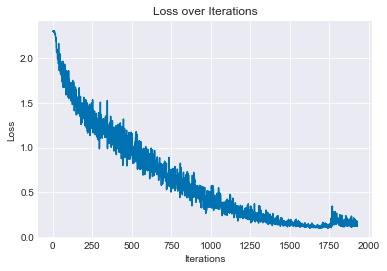

In [200]:
plt.title("Loss over Iterations")
plt.plot(accel_net4.loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

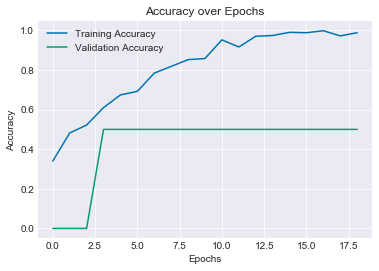

In [202]:
plt.plot(accel_net4.train_acc_history, label = "Training Accuracy")
plt.plot(accel_net4.validation_acc_history, label = "Validation Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.show()

### 7f) Visualize layer weights

Run the following code and submit the inline image of the weight visualization of the 1st layer (convolutional layer) of the network.

**Note:**
- Setting optional parameter to `True` will let you save a .PNG file in your project folder of your weights. I'd suggest setting it to `False` unless look at your weights and they look like they are worth saving. You don't want a training run that produces undesirable weights to overwrite your good looking results!

In [25]:
def plot_weights(wts, saveFig=True, filename='convWts_adam_overfit.png'):
    grid_sz = int(np.sqrt(len(wts)))
    plt.figure(figsize=(10,10))
    for x in range(grid_sz):
        for y in range(grid_sz):
            lin_ind = np.ravel_multi_index((x, y), dims=(grid_sz, grid_sz))
            plt.subplot(grid_sz, grid_sz, lin_ind+1)
            currImg = wts[lin_ind]
            low, high = np.min(currImg), np.max(currImg)
            currImg = 255*(currImg - low) / (high - low)
            currImg = currImg.astype('uint8')
            plt.imshow(currImg)
            plt.gca().axis('off')
    if saveFig:
        plt.savefig('convWts_adam_overfit.png')
    plt.show()

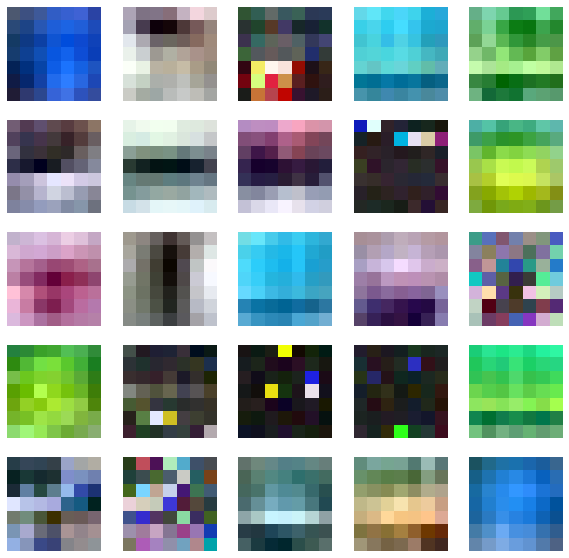

In [195]:
plot_weights(accel_net4.layers[0].wts.transpose(0, 2, 3, 1), saveFig=False, filename='convWts_adam_train_20epoch.png')

**Question 6:** What do the learned filters look like? Does this make sense to you / is this what you expected? In which area of the brain do these filters resemble cell receptive fields?

Note: you should not see RGB "noise". If you do, and you pass the "overfit" test with the Adam optimizer, you probably need to increase the number of training epochs.

We noticed that while the filters aren't as clear as we were hoping for, se can make out edge-like shapes in most of them, which is what we were expecting. These filters represent visual vortex, which is the part of the brain that recognizes edges. 

## Extensions

**General advice:** When making modifications for extensions, make small changes, then check to make sure you pass test code. Also, test out the network runtime on small examples before/after the changes. If you're not careful, the simulation time can become intractable really quickly!

**Remember:** One thorough extension usually is worth more than several "shallow" extensions.

We have another notebook called Proj 3 Extensions where we attempted to implement the adagrad optimizer as well as run our network through another dataset. Note: when we were editing our figure sizes later down to make the images clearer, we were getting issues with our labels and title. 

We tried running a net with an extra dense layer to see if it would improve our filters and test accuracy. We were worried about overfitting so we ended up stopping the network when the training accuracy was over 99%. 

In [316]:
from network import ConvNet4AccelExt
an_loss4 = None
an_train_acc4 = None
an_val_acc4 = None

accel_net5 = ConvNet4AccelExt(input_shape = (3,32,32), wt_scale = 0.001, )
accel_net5.compile('adam', lr = 0.001)

an_loss4, an_train_acc4, an_val_acc4 = accel_net5.fit(x_train, y_train,x_val, y_val,mini_batch_sz=100, n_epochs=75, acc_freq=50)

Starting to train...
3375 iterations. 45 iter/epoch.
Time taken for iteration 0:  0.00806177059809367
  Train acc: 0.142, Val acc: 0.5
  Train acc: 0.196, Val acc: 0.0
  Train acc: 0.208, Val acc: 0.0
  Train acc: 0.256, Val acc: 0.0
  Train acc: 0.3, Val acc: 0.0
  Train acc: 0.316, Val acc: 0.5
  Train acc: 0.322, Val acc: 0.0
  Train acc: 0.352, Val acc: 0.0
  Train acc: 0.358, Val acc: 0.0
  Train acc: 0.338, Val acc: 0.0
  Train acc: 0.382, Val acc: 0.0
  Train acc: 0.356, Val acc: 0.0
  Train acc: 0.38, Val acc: 0.0
  Train acc: 0.402, Val acc: 0.0
  Train acc: 0.374, Val acc: 0.0
  Train acc: 0.448, Val acc: 0.5
  Train acc: 0.428, Val acc: 0.5
  Train acc: 0.432, Val acc: 0.0
  Train acc: 0.472, Val acc: 0.0
  Train acc: 0.522, Val acc: 0.0
  Train acc: 0.5, Val acc: 0.0
  Train acc: 0.444, Val acc: 0.0
  Train acc: 0.532, Val acc: 0.5
  Train acc: 0.568, Val acc: 0.0
  Train acc: 0.588, Val acc: 0.5
  Train acc: 0.634, Val acc: 0.5
  Train acc: 0.65, Val acc: 0.5
  Train acc: 

KeyboardInterrupt: 

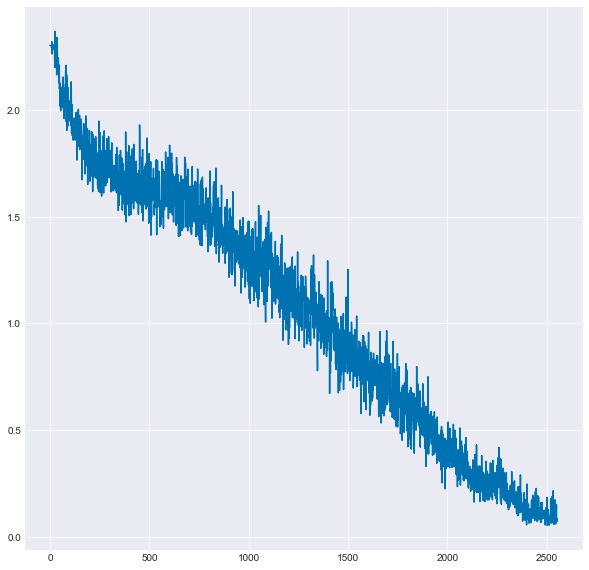

In [319]:
plt.title = "Loss over Iterations"
plt.plot(accel_net5.loss_history)
plt.xlabel ="Iterations"
plt.ylabel= "Loss"
plt.show()

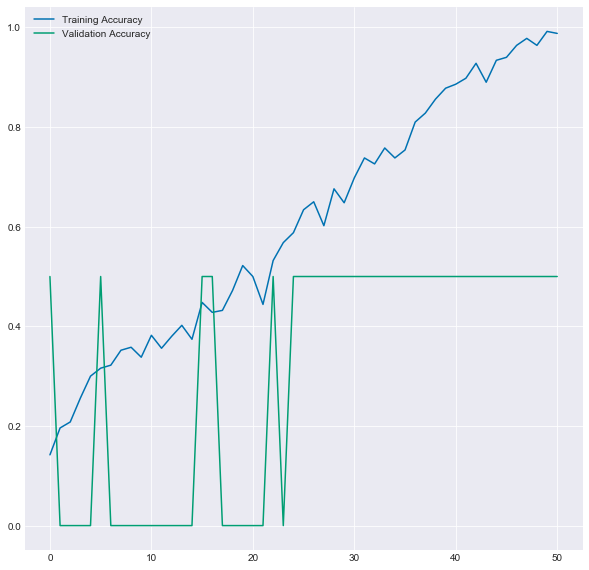

In [320]:
plt.plot(accel_net5.train_acc_history, label = "Training Accuracy")
plt.plot(accel_net5.validation_acc_history, label = "Validation Accuracy")
plt.legend()
plt.show()

In [321]:
accel_net5.accuracy(x_test, y_test, mini_batch_sz = 100)

0.49

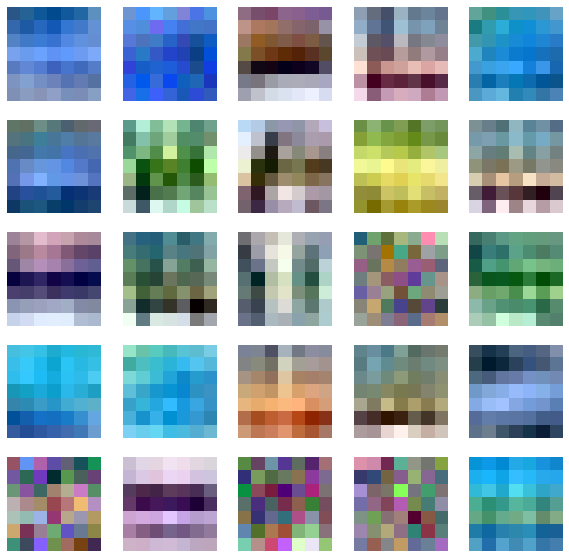

In [317]:
plot_weights(accel_net5.layers[0].wts.transpose(0, 2, 3, 1), saveFig=False, filename='convWts_adam_train_20epoch.png')

We saw that our training accuracy had increased and our some of our filters looked ok but there was still some filters with RGB chaos. So we decided to run the net again with regularization. We ended up less noise in our filters but our test accuracy slightly fell. We still had an issue with certain filters having RGB noise. Looking at the loss, we did notice a spike near the end.

In [323]:
an_loss4 = None
an_train_acc4 = None
an_val_acc4 = None

accel_net6 = ConvNet4AccelExt(input_shape = (3,32,32), wt_scale = 0.001, reg = 0.0001)
accel_net6.compile('adam', lr = 0.001)

an_loss4, an_train_acc4, an_val_acc4 = accel_net6.fit(x_train, y_train,x_val, y_val,mini_batch_sz=100, n_epochs=75, acc_freq=50)

Starting to train...
3375 iterations. 45 iter/epoch.
Time taken for iteration 0:  0.00809542735417684
  Train acc: 0.142, Val acc: 0.5
  Train acc: 0.21, Val acc: 0.0
  Train acc: 0.208, Val acc: 0.0
  Train acc: 0.308, Val acc: 0.0
  Train acc: 0.35, Val acc: 0.0
  Train acc: 0.394, Val acc: 0.0
  Train acc: 0.418, Val acc: 0.0
  Train acc: 0.338, Val acc: 0.0
  Train acc: 0.382, Val acc: 0.0
  Train acc: 0.434, Val acc: 0.0
  Train acc: 0.402, Val acc: 0.0
  Train acc: 0.434, Val acc: 0.0
  Train acc: 0.492, Val acc: 0.0
  Train acc: 0.4, Val acc: 0.0
  Train acc: 0.52, Val acc: 0.0
  Train acc: 0.446, Val acc: 0.5
  Train acc: 0.514, Val acc: 0.5
  Train acc: 0.524, Val acc: 0.5
  Train acc: 0.584, Val acc: 0.5
  Train acc: 0.534, Val acc: 0.5
  Train acc: 0.546, Val acc: 0.5
  Train acc: 0.618, Val acc: 0.5
  Train acc: 0.634, Val acc: 0.5
  Train acc: 0.646, Val acc: 0.5
  Train acc: 0.638, Val acc: 0.5
  Train acc: 0.664, Val acc: 0.5
  Train acc: 0.724, Val acc: 0.5
  Train acc:

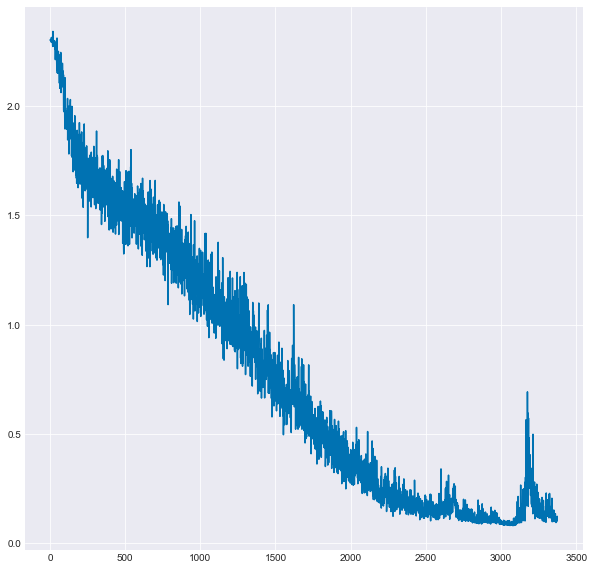

In [326]:
plt.title = "Loss over Iterations"
plt.plot(accel_net6.loss_history)
plt.xlabel ="Iterations"
plt.ylabel= "Loss"
plt.show()

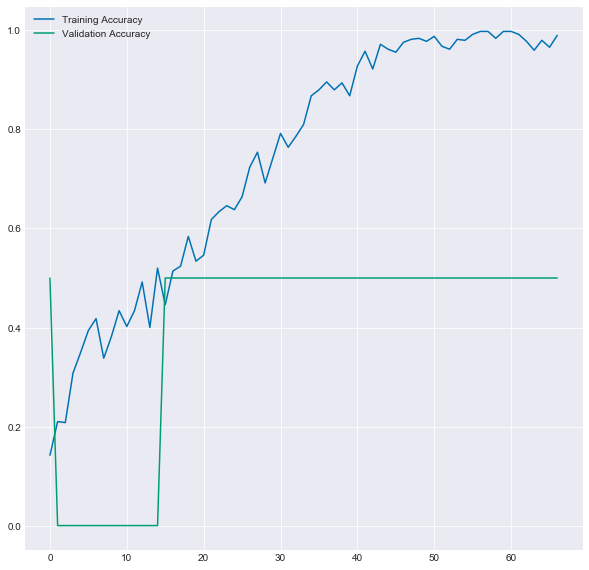

In [327]:
plt.plot(accel_net6.train_acc_history, label = "Training Accuracy")
plt.plot(accel_net6.validation_acc_history, label = "Validation Accuracy")
plt.legend()
plt.show()

In [324]:
accel_net6.accuracy(x_test, y_test, mini_batch_sz = 100)

0.4625

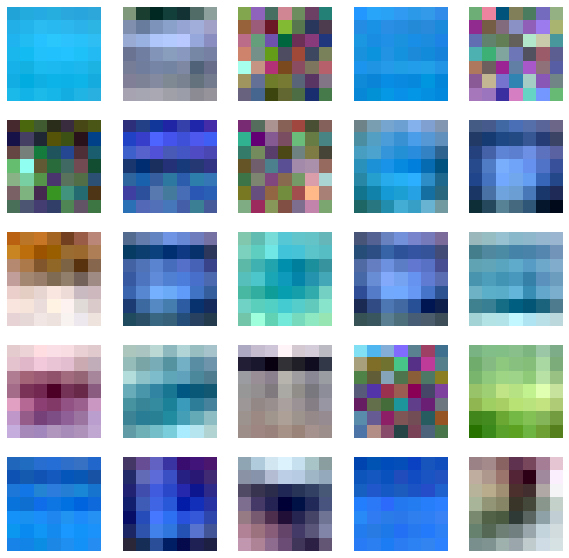

In [325]:
plot_weights(accel_net6.layers[0].wts.transpose(0, 2, 3, 1), saveFig=False, filename='convWts_adam_train_20epoch.png')

We weren't really satisfied with our results for part 6 and we wanted to both test the speed differences between the accelerated network and original network. We also wanted to find out when each optimizer actually plateaued. For our original SGD, we had ran it for 30 minutes 

In [134]:
# ADAM
ad_loss = None
ad_train_acc = None
ad_val_acc = None 
net12 = ConvNet4Accel(input_shape = (3,16,16), wt_scale = 0.01)
net12.compile('adam', lr = 0.01)
ad_loss, ad_train_acc, ad_val_acc = net12.fit(x_dev, y_dev,x_val, y_val,mini_batch_sz=25, n_epochs=200, acc_freq=5)

Starting to train...
400 iterations. 2 iter/epoch.
Time taken for iteration 0:  0.000697624683380127
  Train acc: 0.08, Val acc: 0.0
  Train acc: 0.28, Val acc: 0.0
  Train acc: 0.3, Val acc: 0.0
  Train acc: 0.36, Val acc: 0.0
  Train acc: 0.44, Val acc: 0.0
  Train acc: 0.48, Val acc: 0.0
  Train acc: 0.54, Val acc: 0.0
  Train acc: 0.56, Val acc: 0.5
  Train acc: 0.64, Val acc: 0.5
  Train acc: 0.68, Val acc: 0.5
  Train acc: 0.78, Val acc: 0.0
  Train acc: 0.94, Val acc: 0.0
  Train acc: 0.94, Val acc: 1.0
  Train acc: 0.94, Val acc: 0.5
  Train acc: 0.94, Val acc: 0.5
  Train acc: 0.98, Val acc: 1.0
  Train acc: 1.0, Val acc: 0.5
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0

In [143]:
# SGD-M
sgd_m_loss = None
sgd_m_train_acc = None
sgd_m_val_acc = None 
net22 = ConvNet4Accel(input_shape = (3,16,16), wt_scale = 0.01)
net22.compile('sgd_momentum', lr = 0.01)
sgd_m_loss, sgd_m_train_acc, sgd_m_val_acc = net22.fit(x_dev, y_dev,x_val, y_val,mini_batch_sz=25, n_epochs=250, acc_freq=5)

Starting to train...
500 iterations. 2 iter/epoch.
Time taken for iteration 0:  0.0006648540496826172
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.34, Val acc: 0.0
  Train acc: 0.38, Val acc: 0.0
  Train acc: 0.3, Val acc: 0.0
  Train acc: 0.36, Val acc: 0.0
  Train acc: 0.36, Val acc: 0.0
  Train acc: 0.34, Val acc: 0.0
  Train acc: 0.32, Val acc: 0.0
  Train acc: 0.4, Val acc: 0.0
  Train acc: 0.42, Val acc: 0.0
  Tr

In [148]:
# SGD
sgd_loss = None
sgd_train_acc = None
sgd_val_acc = None 
net32 = ConvNet4Accel(input_shape = (3,16,16), wt_scale = 0.01)
net32.compile('sgd', lr = 0.01)
sgd_loss, sgd_train_acc, sgd_val_acc = net32.fit(x_dev, y_dev,x_val, y_val,mini_batch_sz=25, n_epochs=1500, acc_freq=5)

Starting to train...
3000 iterations. 2 iter/epoch.
Time taken for iteration 0:  0.0005152106285095214
  Train acc: 0.08, Val acc: 0.5
  Train acc: 0.08, Val acc: 0.5
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
 

  Train acc: 0.52, Val acc: 0.0
  Train acc: 0.56, Val acc: 0.0
  Train acc: 0.46, Val acc: 0.0
  Train acc: 0.42, Val acc: 0.0
  Train acc: 0.52, Val acc: 0.0
  Train acc: 0.54, Val acc: 0.0
  Train acc: 0.62, Val acc: 0.0
  Train acc: 0.5, Val acc: 0.0
  Train acc: 0.54, Val acc: 0.0
  Train acc: 0.54, Val acc: 0.0
  Train acc: 0.54, Val acc: 0.0
  Train acc: 0.48, Val acc: 0.0
  Train acc: 0.52, Val acc: 0.0
  Train acc: 0.52, Val acc: 0.0
  Train acc: 0.44, Val acc: 0.0
  Train acc: 0.56, Val acc: 0.0
  Train acc: 0.58, Val acc: 0.0
  Train acc: 0.58, Val acc: 0.0
  Train acc: 0.5, Val acc: 0.0
  Train acc: 0.48, Val acc: 0.0
  Train acc: 0.54, Val acc: 0.0
  Train acc: 0.62, Val acc: 0.0
  Train acc: 0.56, Val acc: 0.0
  Train acc: 0.58, Val acc: 0.0
  Train acc: 0.54, Val acc: 0.0
  Train acc: 0.56, Val acc: 0.0
  Train acc: 0.54, Val acc: 0.0
  Train acc: 0.62, Val acc: 0.0
  Train acc: 0.54, Val acc: 0.0
  Train acc: 0.64, Val acc: 0.0
  Train acc: 0.6, Val acc: 0.0
  Train acc

  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 0.96, Val acc: 0.0
  Train acc: 0.98, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 0.98, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Train acc: 1.0, Val acc: 0.0
  Tra

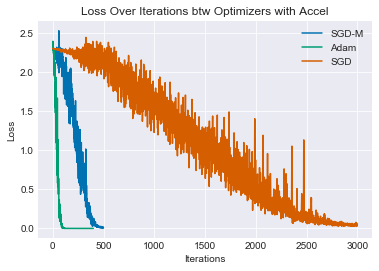

In [149]:
plt.title("Loss Over Iterations btw Optimizers with Accel")
plt.plot(net22.loss_history, label = "SGD-M")
plt.plot(net12.loss_history, label = "Adam")
plt.plot(net32.loss_history, label = "SGD")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

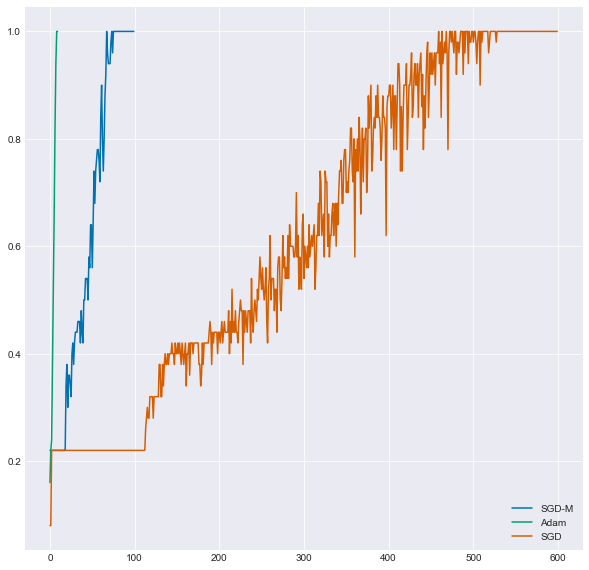

In [309]:
plt.title ="Training Accuracy over Iterations btw Optimizers with Accel"
plt.plot(net22.train_acc_history, label = "SGD-M")
plt.plot(net12.train_acc_history, label = "Adam")
plt.plot(net32.train_acc_history, label = "SGD")
plt.legend()
plt.xlabel = "Epochs"
plt.ylabel ="Training Accuracy"
plt.show()

With the accelerated network, we were able to see when SGD and SGD-M would properly converge. The time it took SGD-M to somewhat converge with the non-accel network was about 30 minutes while SGD-M took about three minutes. Had we run SGD on our non-accel network until it converged, it could potentially take a whole day. With the accel, we were able to finish it slightly longer than SGD-M despite bumping the epochs from 250 for SGD-M to 15000 for SGD. While the charts do resemble what we saw in the in-class animations of the optimizers, we were still surprised at how big of a difference SGD was from all the other optimizers. That being said, different datasets might lead to a smaller or bigger difference between the optimizers. 

We wanted to experiment running with different numbers of dense units and other hyperparameters controlled. We hypothesize that the ideal number of dense units heavily depends on the complexity of the dataset. We believe that a increase up to a point could potentially increase our speed and efficiency, however, we also think there is a peak where any extra dense units are just extra and will slow the net down. We will be using the 3x16x16 data as well as the same structure from part 6. Dense units will be varied from 1 to 500 at a factor of 25.

In [266]:
ad_loss = None
ad_train_acc = None
ad_val_acc = None 
ad_history = []
ad_dense_units = [1, 25, 50, 75, 100, 125, 150, 175, 200, 250]
for i in ad_dense_units:
    net12 = ConvNet4Accel(input_shape = (3,16,16), wt_scale = 0.01,dense_interior_units=(i,))
    net12.compile('adam', lr = 0.01)
    ad_history.append(net12.fit(x_dev, y_dev,x_val, y_val,mini_batch_sz=25, n_epochs=50, acc_freq=10))

Starting to train...
100 iterations. 2 iter/epoch.
Time taken for iteration 0:  0.0004986882209777832
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
Finished training!
Starting to train...
100 iterations. 2 iter/epoch.
Time taken for iteration 0:  0.0004486838976542155
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.24, Val acc: 0.0
  Train acc: 0.3, Val acc: 0.0
  Train acc: 0.34, Val acc: 0.0
  Train acc: 0.32, Val acc: 0.0
  Train acc: 0.46, Val acc: 0.0
  Train acc: 0.48, Val acc: 0.0
  Train acc: 0.52, Val acc: 0.0
  Train acc: 0.52, Val acc: 0.0
Finished training!
Starting to train...
100 iterations. 2 iter/epoch.
Time taken for iteration 0:  0.0005480686823527019
  Train acc: 0.18

We then plotted the loss and accuracy. To make the graphs less cluttered, we split the data into halves. 

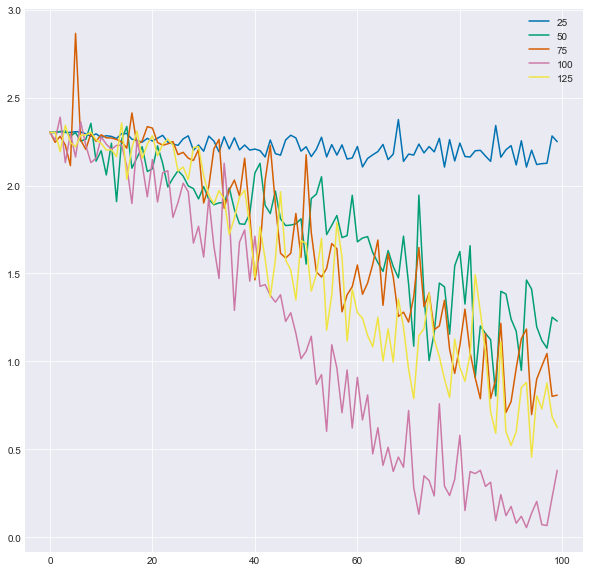

In [276]:
half =int( len(ad_dense_units)/2)

for i in range (half):
    plt.plot(ad_history[i][0], label = str((i+1)*25))
plt.rcParams["figure.figsize"] = (10,10)

plt.xlabel = "Loss"
plt.ylabel = "Iteration"
plt.title ="Loss over Iterations first half"
plt.legend()
plt.show()

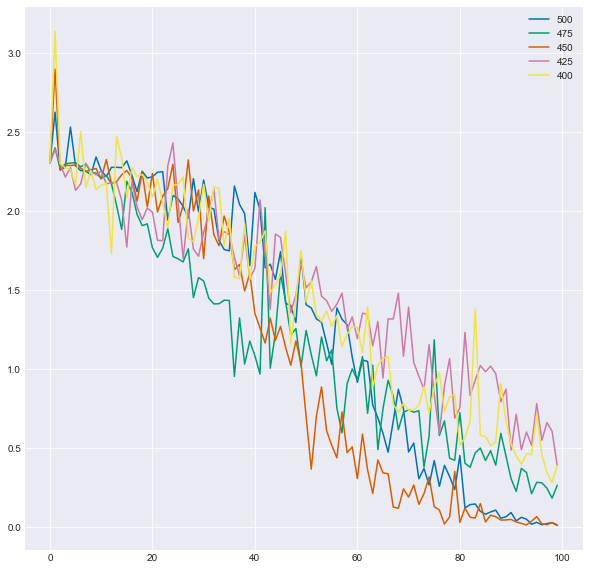

In [289]:
for i in range (half):
    plt.plot(ad_history[-(i+1)][0], label = str(525 - (i+1)*25))
plt.legend()
plt.xlabel = "Iterations"
plt.ylabel = "Loss"
plt.title = "Loss over Iterations"
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

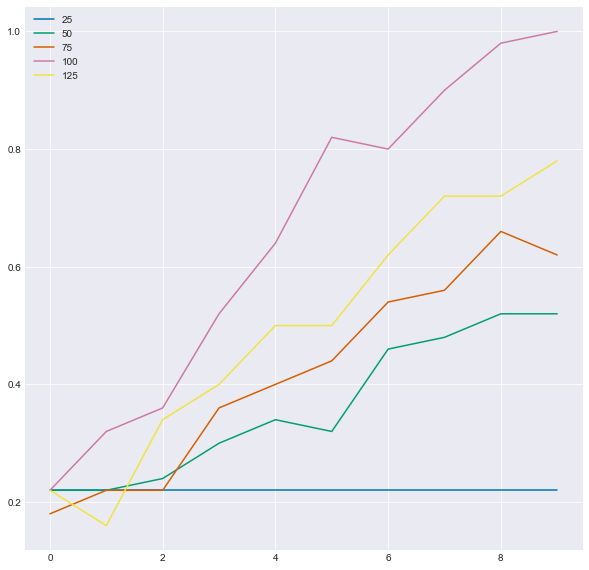

In [278]:
half =int( len(ad_dense_units)/2)

for i in range (half):
    plt.plot(ad_history[i][1], label = str((i+1)*25))
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel = "Epochs"
plt.ylabel = 'Training Accuracy'
plt.title = "Training Accuracy over Epochs"
plt.legend()
plt.show()

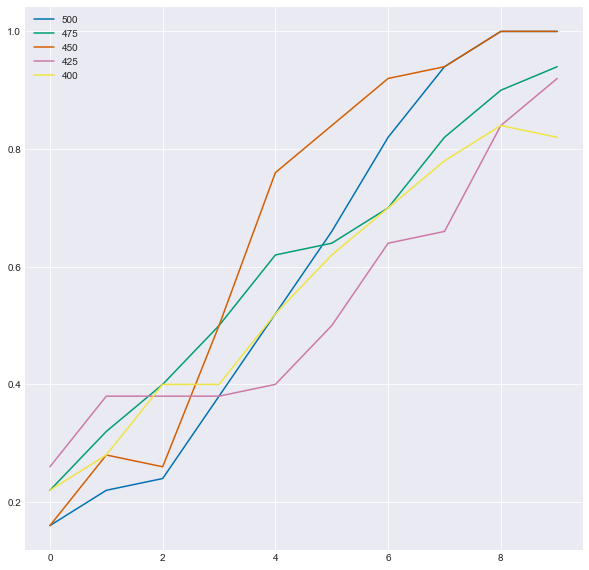

In [288]:
for i in range (half):
    plt.plot(ad_history[-(i+1)][1], label = str(525 - (i+1)*25))
plt.legend()
plt.xlabel = "Epoch"
plt.ylabel = "Training Accuracy"
plt.title ="Training Accuracy over Epoch"
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

At a scale of 25, the only thing we noticed that was striking was any dense units before 100 seemed to give less than ideal results. Strangely, 100 seemed significantly better than 125, but looking at the larger number of dense units, having a larger than 125 number of dense units does not seem to negatively affect loss or accuracy. We decided to try it again with dense units up to 2000. 

In [280]:
ad_loss = None
ad_train_acc = None
ad_val_acc = None 
ad_history2 = []
ad_dense_units = [1, 200, 400, 800, 1000, 1200, 1400, 1600, 1800, 2000]
for i in ad_dense_units:
    net122 = ConvNet4Accel(input_shape = (3,16,16), wt_scale = 0.01,dense_interior_units=(i,))
    net122.compile('adam', lr = 0.01)
    ad_history2.append(net122.fit(x_dev, y_dev,x_val, y_val,mini_batch_sz=25, n_epochs=50, acc_freq=10))

Starting to train...
100 iterations. 2 iter/epoch.
Time taken for iteration 0:  0.00046527783075968424
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
Finished training!
Starting to train...
100 iterations. 2 iter/epoch.
Time taken for iteration 0:  0.0008804639180501302
  Train acc: 0.12, Val acc: 0.0
  Train acc: 0.26, Val acc: 0.0
  Train acc: 0.3, Val acc: 0.0
  Train acc: 0.38, Val acc: 0.0
  Train acc: 0.62, Val acc: 0.5
  Train acc: 0.78, Val acc: 0.5
  Train acc: 0.92, Val acc: 0.5
  Train acc: 0.98, Val acc: 0.5
  Train acc: 0.98, Val acc: 0.5
  Train acc: 1.0, Val acc: 0.5
Finished training!
Starting to train...
100 iterations. 2 iter/epoch.
Time taken for iteration 0:  0.001196761926015218
  Train acc: 0.22,

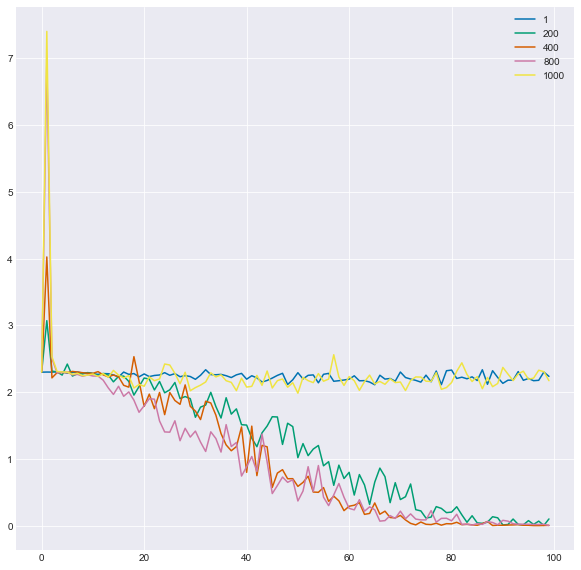

In [286]:
half = int(len(ad_history)/2)
for i in range (half):
    plt.plot(ad_history2[i][0], label = str(ad_dense_units[i]))
plt.rcParams["figure.figsize"] = (10,10)
plt.legend()
plt.xlabel = 'Iterations'
plt.ylabel = 'Loss'

plt.show()

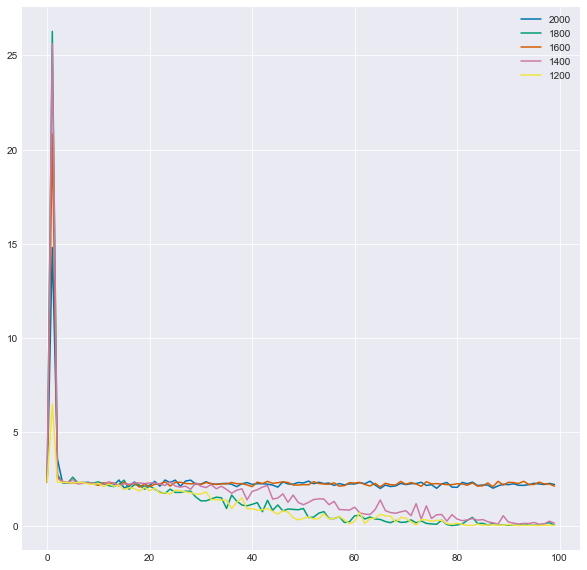

In [287]:
half = int(len(ad_history)/2)
for i in range (half):
    plt.plot(ad_history2[-(i+1)][0], label = str(ad_dense_units[-(i+1)]))
plt.rcParams["figure.figsize"] = (10,10)
plt.legend()
plt.xlabel = 'Iterations'
plt.ylabel = 'Loss'

plt.show()

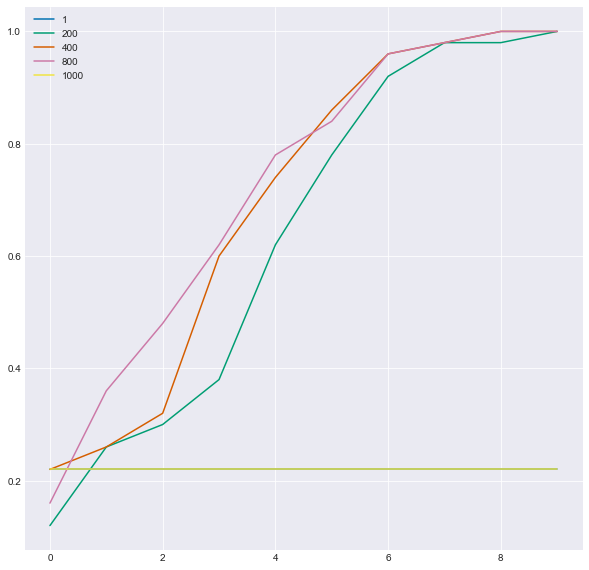

In [290]:
half = int(len(ad_history)/2)
for i in range (half):
    plt.plot(ad_history2[i][1], label = str(ad_dense_units[i]))
plt.rcParams["figure.figsize"] = (10,10)
plt.legend()
plt.xlabel = 'Epoch'
plt.ylabel = 'Training Accuracy '

plt.show()

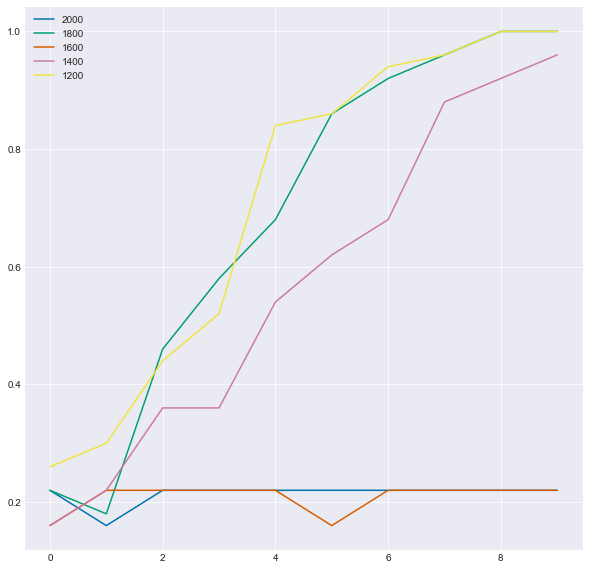

In [291]:
for i in range (half):
    plt.plot(ad_history2[-(i+1)][1], label = str(ad_dense_units[-(i+1)]))
plt.legend()
plt.xlabel = "Epoch"
plt.ylabel = "Training Accuracy"
plt.title ="Training Accuracy over Epoch"
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

We see that there is a higher initial spike in loss when the number of dense units are higher. Also, at dense units of 2000, 1600, and 1000, we saw that the training accuracy was stuck at 0.22. Also, it took 0.004604764779408773 much time for 2000 units versus 0.0008804639180501302 for 200 units. It seems that the network is more unpredictable when the number of dense units are extremely high and that our default of 100 dense units seem to be a good number for this dataset. If we had more time, we would have liked to have run the larger dataset to see the effects of an increase in resolution and sample size. 

We wanted to look more into the time difference between our accel and non-accel network. We wanted to see if the time difference was big enough to warrant the extra step of using C and further optimizing the algorithms. 

In [305]:
import time
start_time = time.time()
results = None

net300 = ConvNet4Accel(input_shape = (3,16,16), wt_scale = 0.01)
net300.compile('adam', lr = 0.01)
net300.fit(x_dev, y_dev,x_val, y_val,mini_batch_sz=25, n_epochs=20, acc_freq=10)
print(time.time() - start_time)


Starting to train...
40 iterations. 2 iter/epoch.
Time taken for iteration 0:  0.0006150444348653158
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.24, Val acc: 0.0
  Train acc: 0.36, Val acc: 0.0
  Train acc: 0.46, Val acc: 0.0
Finished training!
1.6635518074035645


In [306]:
start_time = time.time()
results = None
net301 = ConvNet4(input_shape = (3,16,16), wt_scale = 0.01)
net301.compile('adam', lr = 0.01)
net301.fit(x_dev, y_dev,x_val, y_val,mini_batch_sz=25, n_epochs=20, acc_freq=10)
print(time.time() - start_time)

Starting to train...
40 iterations. 2 iter/epoch.
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
Time taken for iteration 0:  0.06771862904230753
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
  Train acc: 0.22, Val acc: 0.0
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25

In [303]:
start_time = time.time()
results = None
net301 = ConvNet4Accel(input_shape = (3,16,16), wt_scale = 0.01)
net301.compile('sgd_momentum', lr = 0.01)
net301.fit(x_dev, y_dev,x_val, y_val,mini_batch_sz=25, n_epochs=20, acc_freq=10)
print(time.time() - start_time)

Starting to train...
400 iterations. 2 iter/epoch.
Time taken for iteration 0:  0.0005489468574523925
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.22, Val acc: 0.0
  Train acc: 0.28, Val acc: 0.0
  Train acc: 0.28, Val acc: 0.0
  Train acc: 0.36, Val acc: 0.0
  Train acc: 0.38, Val acc: 0.0
  Train acc: 0.36, Val acc: 0.0
  Train acc: 0.44, Val acc: 0.0
  Train acc: 0.3, Val acc: 0.0
  Train acc: 0.44, Val acc: 0.0
  Train acc: 0.4, Val acc: 0.0
  Train acc: 0.5, Val acc: 0.0
  Train acc: 0.4, Val acc: 0.0
  Train acc: 0.58, Val acc: 0.0
  Train acc: 0.5, Val acc: 0.0
  Train acc: 0.58, Val acc: 0.0
  Train acc: 0.6, Val acc: 0.0
  Train acc: 0.64, Val acc: 0.0
  Train acc: 0.72, Val acc: 0.0
  Train acc: 0.8, Val acc: 0.0
  Train acc: 0.82, Val acc: 0.0
  Train a

In [304]:
start_time = time.time()
results = None
net301 = ConvNet4(input_shape = (3,16,16), wt_scale = 0.01)
net301.compile('sgd_momentum', lr = 0.01)
net301.fit(x_dev, y_dev,x_val, y_val,mini_batch_sz=25, n_epochs=20, acc_freq=10)
print(time.time() - start_time)

Starting to train...
40 iterations. 2 iter/epoch.
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
Time taken for iteration 0:  0.0690664529800415
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
  Train acc: 0.22, Val acc: 0.0
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25, 3, 22, 22)
pad_x=3, pad_y=3
Padded shape is (25,

As expected, the accel network was signifcantly faster. we looked into SGD and SGD-M research and found that while adam consistently outperformed in training performance, that did not necessarily mean adam performed better than SGD/SGD-M in validation accuracy. So while adam is still significantly faster, we feel that with the accel network makes SGD-M a viable choice.

### 0. Pedal to the metal: achieve high accuracy on STL-10

You can achieve higher (>50%) classification accuracy on the STL-10 test set. Find the hyperparameters to achieve this.

### 1. Experiment with different network architectures.

The design of the `Network` class is modular. As long as you're careful about shapes, adding/removing network layers (e.g. `Conv2D`, `Dense`, etc.) should be straight forward. Experiment with adding another sequence of `Conv2D` and `MaxPooling2D` layers. Add another `Dense` hidden layer before the output layer. How do the changes affect classification accuracy and loss? 

### 2. Experiment with different network hyperparameters.

Explore the affect one or more change below has on classification. Be careful about how the hyperparameters may affect the shape of network layers. Thorough analysis will get you more points (not try a few ad hoc values).

- Experiment with different numbers of hidden units in the Dense layers.
- Experiment different max pooling window sizes and strides.
- Experiment with kernel sizes (not 7x7). Can you get away with smaller ones? Do they perform just as well? What is the change in runtime like? What is the impact on their visualized appearance?
- Experiment with number of kernels in the convolutional layer. Is more/fewer better? What is the impact on their visualized appearance?

###  3. Add and test some training bells and whistles

Add features like early stopping, learning rate decay (learning rate at the end of an epoch becomes some fraction of its former value), etc and assess how they affect training loss convergence and accuracy. 

### 4. Additional optimizers

Research other optimizers used in backpropogation and implement one or more of them within the model structure. Compare its performance to ones you have implemented

### 5. Optimize your algorithms

Find the main performance bottlenecks in the network and improve your code to reduce runtime (e.g. reduce explicit for loops, increase vectorization, etc). Research faster algorithms to do operations like convolution and implement them. Given the complexity of the network, I suggest focusing on one area at a time and make sure everything you change passes the test code before proceeding. Quantify and discuss your performance improvements

### 6. Additional loss functions

Implement support for sigmoid, or another activation functions and associated losses. Test it out and compare with softmax/cross entropy. Make sure any necessary changes to the layer's gradient are made.

### 7. Additional datasets

Do classification and analyxe the results with an image dataset of your choice.

### 8. Performance analysis

Do a thorough comparative analysis of the non-accelerated network and accelerated networks with respect to runtime.